# Decision Tree Classifier

### Normal df

test data score: 0.9147540385308461 
train data score: 0.9705747791642064


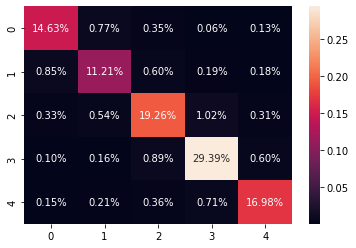

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import Normalizer, StandardScaler
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

%store -r X y  X_under y_under X_over y_over

# splitting X and y in train and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ("classifier", DecisionTreeClassifier(criterion = "entropy", max_depth=20))])


pipe.fit(X_train, y_train)

predictions = pipe.predict(X_test)



cm = confusion_matrix(y_test, predictions, labels=pipe.classes_)
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%')


print('test data score:', pipe.score(X_test, y_test), '\ntrain data score:', pipe.score(X_train, y_train))

In [2]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           a       0.91      0.92      0.91     34968
           b       0.87      0.86      0.86     28548
           c       0.90      0.90      0.90     47054
           d       0.94      0.94      0.94     68268
           e       0.93      0.92      0.93     40363

    accuracy                           0.91    219201
   macro avg       0.91      0.91      0.91    219201
weighted avg       0.91      0.91      0.91    219201



In [3]:
from sklearn.model_selection import cross_validate

# cross validation
cv_dict = cross_validate(pipe, X_train, y_train, cv = 5, return_train_score=True)

cv_dict

{'fit_time': array([3.3788352 , 3.38078856, 3.37767768, 3.31123734, 3.30297089]),
 'score_time': array([0.13388157, 0.13763165, 0.13567615, 0.13093424, 0.1315639 ]),
 'test_score': array([0.90966235, 0.90966146, 0.90791159, 0.91007205, 0.9100525 ]),
 'train_score': array([0.97224883, 0.97201917, 0.97158903, 0.97230023, 0.97177722])}

### UnderSampeled Df

test data score: 0.8989489212612944 
train data score: 0.9697774492793566


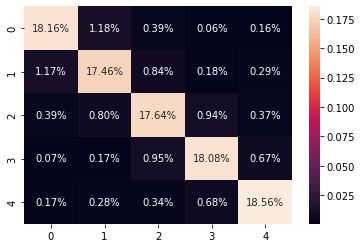

In [4]:
X_under_train, X_under_test, y_under_train, y_under_test = train_test_split(X_under, y_under, test_size=0.33, random_state=40)

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ("classifier", DecisionTreeClassifier(criterion = "entropy", max_depth=20))])


pipe.fit(X_under_train, y_under_train)

predictions_under_df = pipe.predict(X_under_test)


cm = confusion_matrix(y_under_test, predictions_under_df, labels=pipe.classes_)
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%')



print('test data score:', pipe.score(X_under_test, y_under_test), '\ntrain data score:', pipe.score(X_under_train, y_under_train))

In [5]:
cv_dict = cross_validate(pipe, X_under_train, y_under_train, cv = 5, return_train_score=True)

cv_dict

{'fit_time': array([1.99629235, 1.97981381, 1.99394727, 2.00081062, 2.26494956]),
 'score_time': array([0.07767367, 0.07761598, 0.07790399, 0.07764697, 0.08068919]),
 'test_score': array([0.89212339, 0.89362668, 0.89440965, 0.89506569, 0.89345276]),
 'train_score': array([0.97180529, 0.97152342, 0.97182095, 0.97199723, 0.97267058])}

In [6]:
print(classification_report(y_under_test, predictions_under_df))

              precision    recall  f1-score   support

           a       0.91      0.91      0.91     31375
           b       0.88      0.88      0.88     31367
           c       0.88      0.88      0.88     31690
           d       0.91      0.91      0.91     31355
           e       0.93      0.93      0.93     31480

    accuracy                           0.90    157267
   macro avg       0.90      0.90      0.90    157267
weighted avg       0.90      0.90      0.90    157267



### OverSampled df

test data score: 0.915438222820096 
train data score: 0.9658565955981143


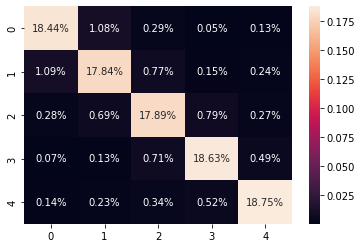

In [7]:
X_over_train, X_over_test, y_over_train, y_over_test = train_test_split(X_over, y_over, test_size=0.33, random_state=40)

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ("classifier", DecisionTreeClassifier(criterion = "entropy", max_depth=20))])


pipe.fit(X_over_train, y_over_train)

predictions_over_df = pipe.predict(X_over_test)


cm = confusion_matrix(y_over_test, predictions_over_df, labels=pipe.classes_)
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%')

# cross_val_score(pipe, X, y, cv=10)
# pipe.score(X_test, y_test)

print('test data score:', pipe.score(X_over_test, y_over_test), '\ntrain data score:', pipe.score(X_over_train, y_over_train))

In [8]:
cv_dict = cross_validate(pipe, X_over_train, y_over_train, cv = 5, return_train_score=True)

cv_dict

{'fit_time': array([7.82926583, 7.63512564, 7.55313444, 7.58178329, 7.56396961]),
 'score_time': array([0.20310068, 0.20325947, 0.20169425, 0.20101404, 0.20208907]),
 'test_score': array([0.91121701, 0.91093437, 0.91119072, 0.91042824, 0.91213667]),
 'train_score': array([0.96783608, 0.96709496, 0.96742033, 0.96641957, 0.96680087])}

In [9]:
print(classification_report(y_over_test, predictions_over_df))

              precision    recall  f1-score   support

           a       0.92      0.92      0.92     74866
           b       0.89      0.89      0.89     75248
           c       0.89      0.90      0.90     74629
           d       0.93      0.93      0.93     75077
           e       0.94      0.94      0.94     74841

    accuracy                           0.92    374661
   macro avg       0.92      0.92      0.92    374661
weighted avg       0.92      0.92      0.92    374661



In [10]:
pipe.predict(X_test)

array(['a', 'a', 'b', ..., 'c', 'a', 'd'], dtype=object)

In [13]:
import joblib as joblib

In [14]:
# save the model to disk
filename = 'finalized_model.joblib'
joblib.dump(pipe, filename)

['finalized_model.joblib']